<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/FinalProject_Regression_ETC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Final Project - Regression**
#**ETHAN CRAYCROFT**
#**CS430-ON**
#**Machine Learning in the Cloud**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.model_selection import GridSearchCV


In [7]:
from sklearn import tree


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/nfl_widereceivers.csv')

In [10]:
df

,Player,Team,DYAR,YAR,DVOA,VOA,Passes,Yards,EYds,Catch_Rate,FUM,TD
0,C. Kupp,LAR,618,641,0.276,0.291,191,1947,2160,0.76,0,16
1,D. Adams,GB,423,441,0.176,0.189,169,1553,1762,0.73,0,11
2,J. Jefferson,MIN,416,410,0.189,0.185,167,1616,1686,0.65,1,10
3,M. Evans,TB,340,353,0.239,0.253,114,1035,1258,0.65,0,14
4,T. Higgins,CIN,334,339,0.250,0.255,110,1091,1217,0.67,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
165,J. Winfree,GB,-61,-57,-0.686,-0.657,13,58,-1,0.62,2,0
166,A. Wilson,MIA,-61,-64,-0.320,-0.328,39,213,167,0.64,0,0
167,T. Montgomery,NO,-63,-74,-0.445,-0.501,26,95,68,0.62,0,0
168,T. Marshall,CAR,-70,-66,-0.423,-0.407,30,138,89,0.57,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      170 non-null    object 
 1   Team        170 non-null    object 
 2   DYAR        170 non-null    int64  
 3   YAR         170 non-null    int64  
 4   DVOA        170 non-null    float64
 5   VOA         170 non-null    float64
 6   Passes      170 non-null    int64  
 7   Yards       170 non-null    int64  
 8   EYds        170 non-null    int64  
 9   Catch_Rate  170 non-null    float64
 10  FUM         170 non-null    int64  
 11  TD          170 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 16.1+ KB


In [11]:
df.describe()

,DYAR,YAR,DVOA,VOA,Passes,Yards,EYds,Catch_Rate,FUM,TD
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,64.635294,64.564706,-0.039724,-0.040318,61.582353,488.582353,493.552941,0.612353,0.364706,3.005882
std,111.368342,113.366291,0.232506,0.235719,42.673339,376.683938,403.667932,0.100362,0.631464,3.083641
min,-183.000000,-193.000000,-0.703000,-0.694000,10.000000,25.000000,-3.000000,0.260000,0.000000,0.000000
25%,-8.750000,-9.750000,-0.151000,-0.171250,23.250000,184.000000,183.000000,0.552500,0.000000,1.000000
50%,42.500000,44.500000,-0.012000,-0.005500,54.000000,408.000000,382.500000,0.620000,0.000000,2.000000
75%,112.750000,116.750000,0.092000,0.093750,84.750000,693.000000,701.250000,0.677500,1.000000,5.000000
max,618.000000,641.000000,0.911000,0.947000,191.000000,1947.000000,2160.000000,0.950000,4.000000,16.000000


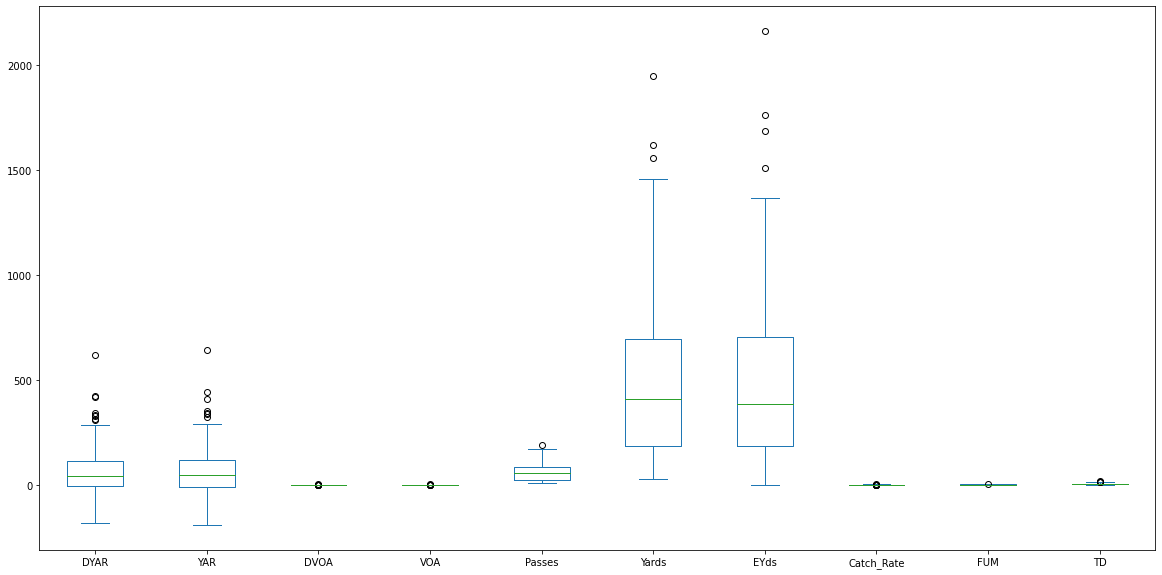

In [53]:
df.plot(kind='box',figsize=(20,10))

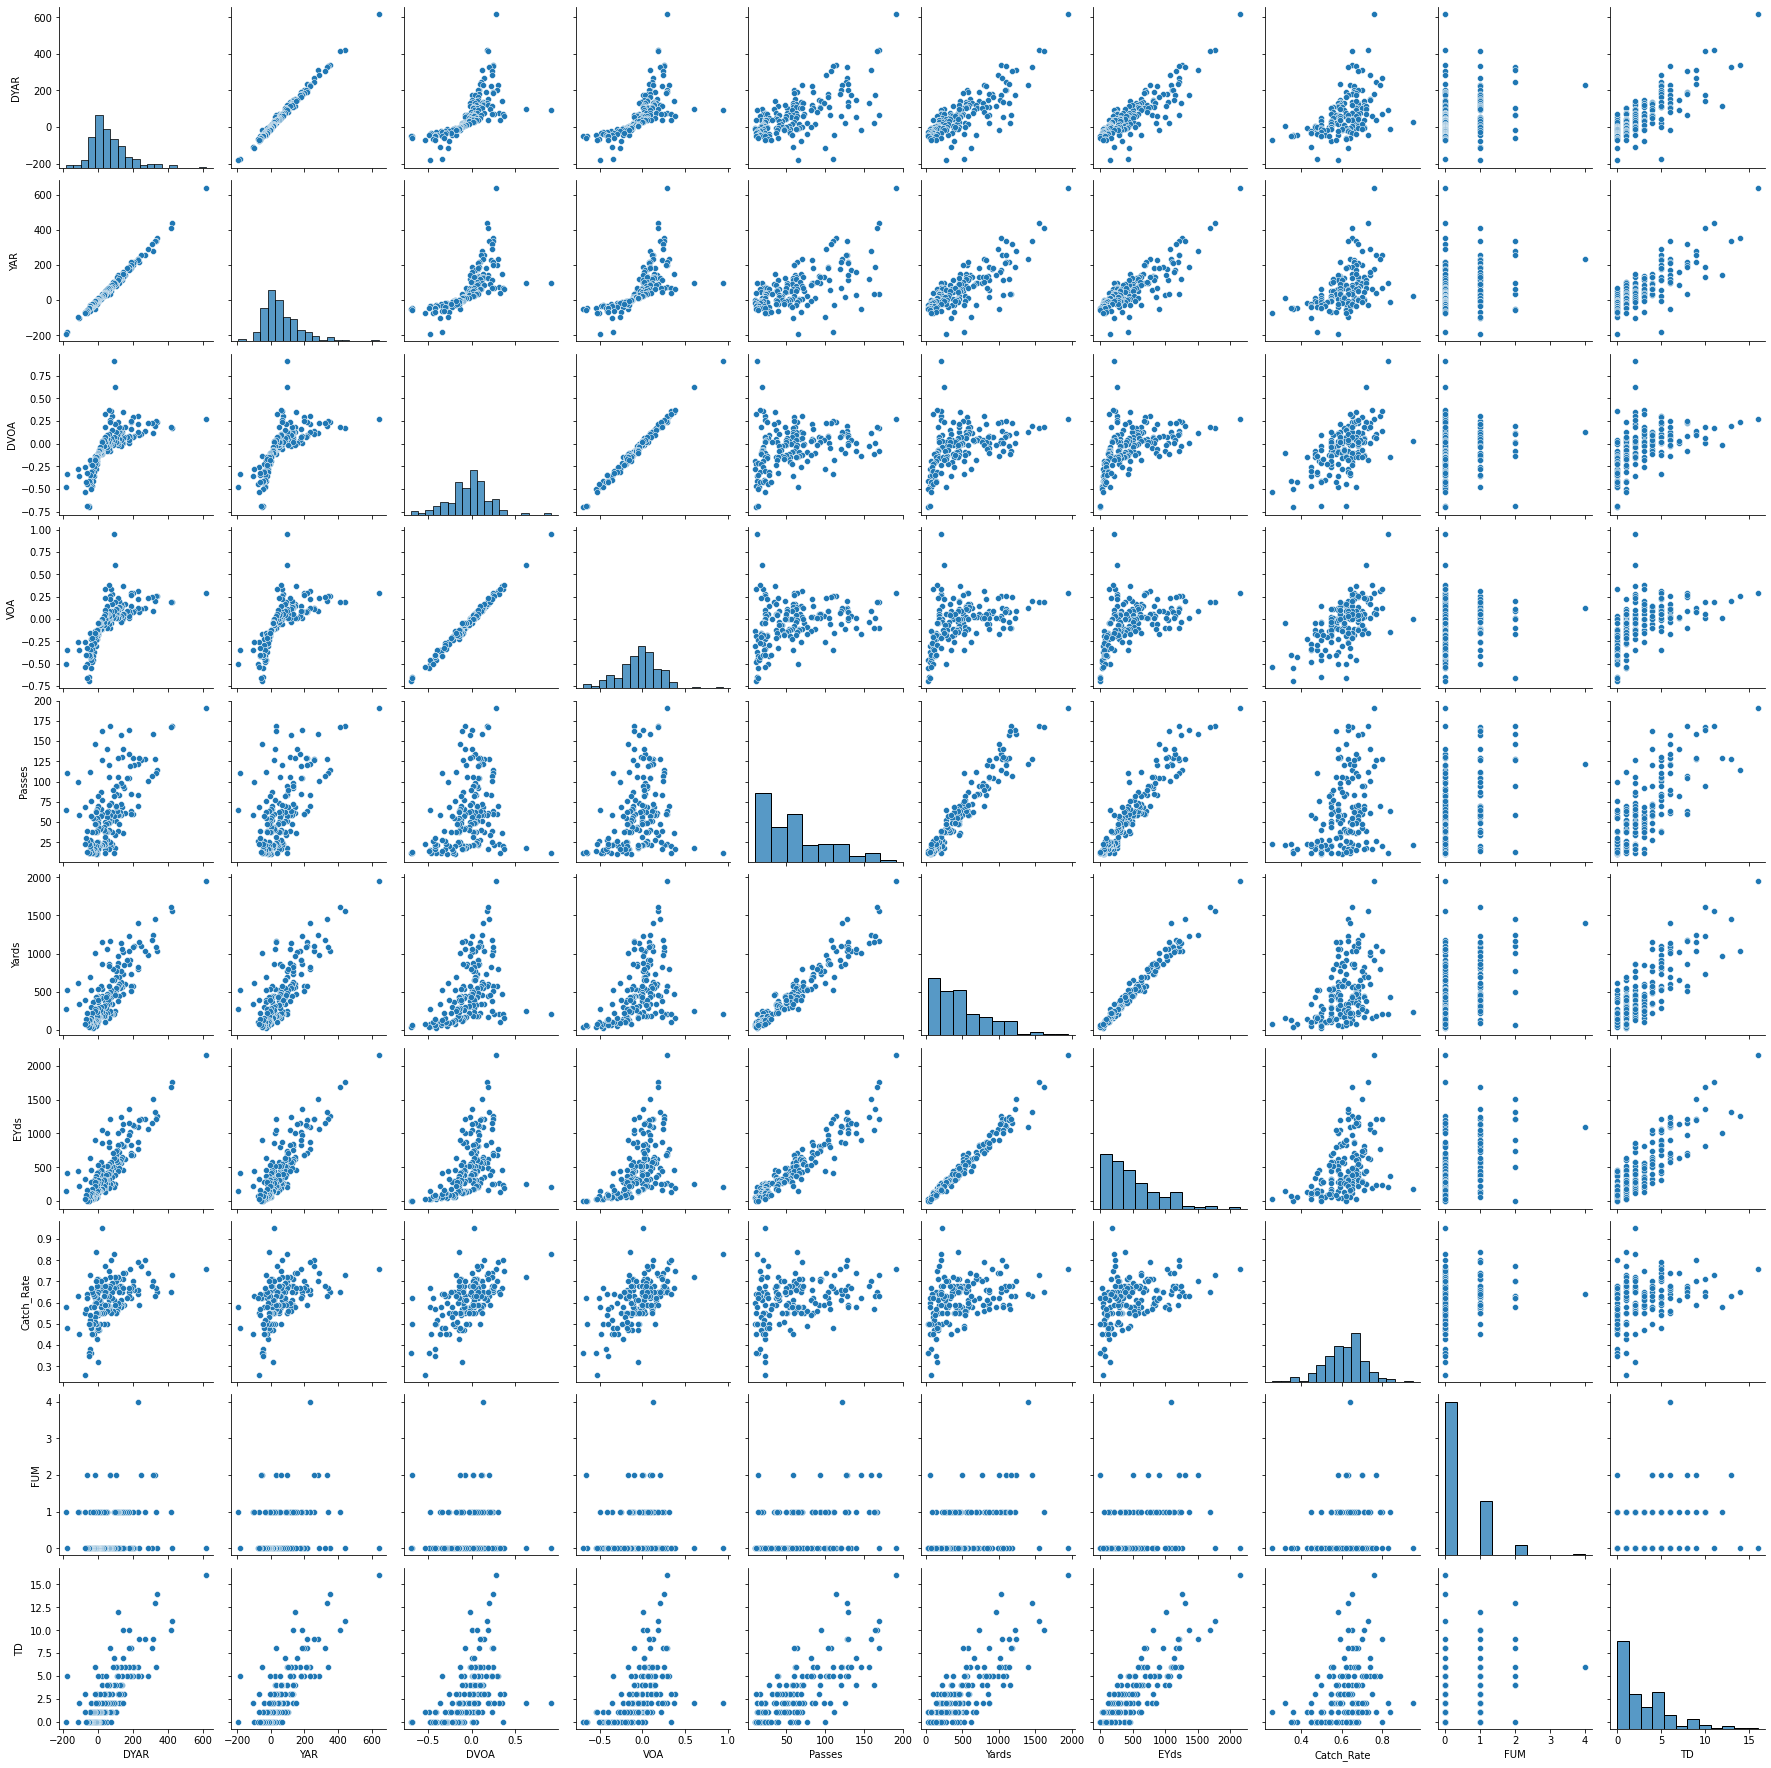

In [12]:
sns.pairplot(df)

#LINEAR REGRESSION

In [13]:
X = df.iloc[:,2:-1]
X

,DYAR,YAR,DVOA,VOA,Passes,Yards,EYds,Catch_Rate,FUM
0,618,641,0.276,0.291,191,1947,2160,0.76,0
1,423,441,0.176,0.189,169,1553,1762,0.73,0
2,416,410,0.189,0.185,167,1616,1686,0.65,1
3,340,353,0.239,0.253,114,1035,1258,0.65,0
4,334,339,0.250,0.255,110,1091,1217,0.67,1
...,...,...,...,...,...,...,...,...,...
165,-61,-57,-0.686,-0.657,13,58,-1,0.62,2
166,-61,-64,-0.320,-0.328,39,213,167,0.64,0
167,-63,-74,-0.445,-0.501,26,95,68,0.62,0
168,-70,-66,-0.423,-0.407,30,138,89,0.57,0


In [14]:
y = df[['TD']]
y

,TD
0,16
1,11
2,10
3,14
4,6
...,...
165,0
166,0
167,0
168,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

In [16]:
num_attributes = ['DYAR', 'YAR', 'DVOA', 'VOA', 'Passes', 'Yards', 'EYds', 'Catch_Rate', 'FUM']


In [17]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attributes),]
                  )

In [18]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr', LinearRegression()),
                     ])

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['DYAR', 'YAR', 'DVOA', 'VOA',
                                                   'Passes', 'Yards', 'EYds',
                                                   'Catch_Rate', 'FUM'])])),
                ('mlr', LinearRegression())])

In [55]:
y_pred = pipeline.predict(X_test)

In [56]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_MSE = mean_squared_error(y_train, y_train_pred)**(0.5)
test_MSE = mean_squared_error(y_test, y_test_pred)**(0.5)

In [22]:
print("Train RMSE: ", train_MSE)
print("Test RMSE:", test_MSE)

Train RMSE:  1.383274792702787
Test RMSE: 1.7151253368433597


In [54]:
r2_score(y_pred, y_test)

0.5561431036604594

#SVM

In [23]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

In [24]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X,y, test_size=.20, random_state=7)

In [25]:
num_attributes_SVM = ['DYAR', 'YAR', 'DVOA', 'VOA', 'Passes', 'Yards', 'EYds', 'Catch_Rate', 'FUM']


In [26]:
col_transform_SVM = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attributes_SVM),]
                  )

In [27]:
pipelineSVM = Pipeline([
                     ('trans', col_transform_SVM),
                     ('SVR', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0)),
                     ])

In [28]:
pipelineSVM.fit(X_train_SVM,np.ravel(y_train_SVM))


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['DYAR', 'YAR', 'DVOA', 'VOA',
                                                   'Passes', 'Yards', 'EYds',
                                                   'Catch_Rate', 'FUM'])])),
                ('SVR',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

In [29]:
y_pred_SVM = pipelineSVM.predict(X_test_SVM)


In [30]:
y_train_pred_SVM = pipelineSVM.predict(X_train_SVM)

train_RMSE = mean_squared_error(y_train_SVM, y_train_pred_SVM)**(0.5)
test_RMSE = mean_squared_error(y_test_SVM, y_pred_SVM)**(0.5)

In [31]:
print("Train RMSE: ", train_RMSE)
print("Test RMSE:", test_RMSE)

Train RMSE:  1.577678714469174
Test RMSE: 1.3590357051430955


In [57]:
r2_score(y_pred_SVM, y_test_SVM)

0.4518903295437242

#CONCLUSION

From these results, there is no clear winner between the 2 models. Under the linear regression model, the RMSE was ~1.38 for the training data and ~1.72. These numbers are fairly close, but I would like the gap between them to be smaller. The smaller the gap, the better the model is working. Small gaps show little difference between the testing and training data, which is desired. The r2 score for the linear regression model was not great. At 0.556, the model is only accounting for 55.6% of the variation in the data. This number is pretty low, as you would like to see *more* variation accounted for. 

The SVM model was slightly better than the linear regression model. For this model, the RMSE was ~1.58 for the training data, and ~1.36 for the testing data. The difference between the two values is closer, which is desired. This shows that the model is producing results similar to the training data. However, the r2 score for this model was even lower than that of the linear regression model. At ~0.45, this model is only taking into account 45% of the variation in the data. This number is alarmingly low.

Between the 2 models, I would probably lean towards the SVM because of the RMSE values being closer in nature. Neither one of these models has a great r2 score. 
